In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load in data
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [5]:
#reindex with PetID
data.index = data['PetID']
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [6]:
data['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

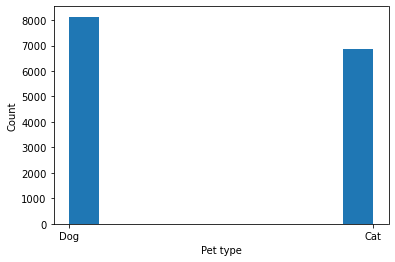

In [7]:
plt.hist(data.Type)
plt.xticks([1,2], ['Dog', 'Cat'])
plt.xlabel('Pet type')
plt.ylabel('Count')
plt.show()

In [8]:
data.Name.value_counts()

Baby                66
Lucky               64
Brownie             54
No Name             54
Mimi                52
                    ..
Little Boy Blue      1
The Nameless One     1
--@ Baby --@         1
Q5                   1
Marie Girl           1
Name: Name, Length: 9060, dtype: int64

In [9]:
data['Age'].value_counts()

2      3503
1      2304
3      1966
4      1109
12      967
       ... 
75        1
122       1
82        1
74        1
43        1
Name: Age, Length: 106, dtype: int64

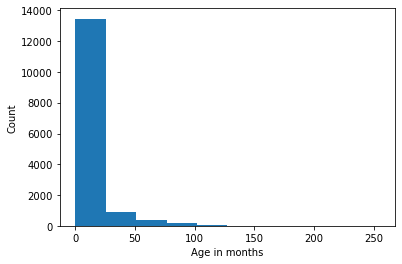

In [10]:
plt.hist(data.Age, bins = 10)
plt.xlabel('Age in months')
plt.ylabel('Count')
plt.show()

In [11]:
data['Breed1'].value_counts() #We notice a large proportion of breed 307 (unknown breed)

307    5927
266    3634
265    1258
299     342
264     296
       ... 
139       1
302       1
7         1
23        1
93        1
Name: Breed1, Length: 176, dtype: int64

In [12]:
data[data['Breed1'] == 0] 

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
375905770,1,Lil Milo,2,0,26,2,2,0,0,2,...,1,1,0,41326,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3.0,3
da8d4a273,1,Bella 4 Months Puppy!,4,0,307,2,2,3,0,2,...,1,1,100,41326,3673e167fc9932b13149bed1f2a0180a,0,"She's only 4 months old, very friendly and lov...",da8d4a273,5.0,4
27e74e45c,2,NaN,3,0,266,3,1,4,7,1,...,1,3,0,41401,f7cff59d10c867bdee12c3f35f34d086,0,Mama cat came to house and gave birth to these...,27e74e45c,11.0,2
7b5bee232,1,"""Boy Boy""",72,0,307,1,1,2,0,2,...,1,1,0,41326,94b991f8dc1e0bb903ca8d4d492c8d43,0,He is a stray dog found wandering around Unive...,7b5bee232,5.0,4
0327b8e94,1,Looking Newborn Puppy For Adoption,2,0,205,2,2,5,7,1,...,1,1,1,41336,5232bdd1444960a257ccec9a41404320,0,I want to adopt a newborn puppy Prefer small b...,0327b8e94,0.0,3


In [13]:
#There appears to be some breeds mistakenly filled into Breed2 instead of Breed1
data.Breed1 = np.where((data['Breed1']==0) & (data['Breed2']!=0), data['Breed2'], data['Breed1'])
data.Breed2 = np.where((data['Breed1']== data['Breed2']), 0, data['Breed2'])

In [14]:
data[(data.Breed1 == 307) & (data.Breed2 != 0)]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
1bf24d8be,1,Donut,10,307,117,2,1,2,7,2,...,1,1,0,41326,aa66486163b6cbc25ea62a34b11c9b91,0,Donut is a friendly doggie and very domesticat...,1bf24d8be,0.0,4
6fecc5cf7,1,Blackie Duo,1,307,141,2,1,0,0,2,...,1,2,0,41326,8b6c5cd067ada5f54ca5ffc7f7b5d896,0,2 adorable female black pups rescued from USJ ...,6fecc5cf7,13.0,3
815f4cc08,1,Cody,3,307,141,1,5,0,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Lovely puppy with good nature looking for a ho...,815f4cc08,3.0,3
8df0bb3b3,1,Molly,2,307,76,1,1,7,0,2,...,1,1,0,41326,e03a1162538a0414d6c79823ad6c2744,4,"Mochi, momo and Molly are siblings, about 3 mo...",8df0bb3b3,18.0,3
6d9b202c9,1,Polly,4,307,36,2,1,2,7,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,She was found wandering around a playground of...,6d9b202c9,10.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1f58a286e,1,Blackie,1,307,189,2,1,3,0,2,...,1,1,0,41326,f894b0c7b058834d0a9749b665479732,0,Found it beside road under a big tree alone an...,1f58a286e,1.0,1
94e45a1a7,1,å¤å¤,2,307,109,2,2,0,0,2,...,1,2,0,41327,97af7642dd8e837dedbefe1f013ca31e,0,"cute,fat,active^^ One male and one female",94e45a1a7,0.0,0
5bbf44cea,1,Pinky,24,307,152,2,1,2,0,2,...,1,1,0,41327,86552e2f34c929a01f7841cbd8865b20,0,Previously always stay together with a male do...,5bbf44cea,2.0,4


In [15]:
#If Breed1 == 307 and Breed2 != 0, swap the values so that Breed1 contains a known breed
tempBreed1 = np.where((data['Breed1'] == 307) & (data['Breed2'] != 0), data['Breed2'], data['Breed1'])
data.Breed2 = np.where((data['Breed1'] == 307) & (data['Breed2'] != 0), 307, data['Breed2'])
data.Breed1 = tempBreed1

In [16]:
#Create new predictor: pureBreed
data['pureBreed'] = np.where((data.Breed2 == 0), 1, 0)

In [17]:
data.Gender.value_counts()

2    7277
1    5536
3    2180
Name: Gender, dtype: int64

In [18]:
data.Color1.value_counts()

1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: Color1, dtype: int64

In [19]:
data.Color2.value_counts()

0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: Color2, dtype: int64

In [20]:
data.Color3.value_counts()

0    10604
7     3221
5      417
6      378
4      198
3      175
Name: Color3, dtype: int64

In [21]:
#Create new predictor: pureColor (1: 1 color, 2: 2 colors, 3: 3+ colors)

data['pureColor'] = np.where((data.Color3 != 0), 3, 2) #Identify pets with 3+ colors, label everything else as '2'
data['pureColor'] = np.where((data.Color2 == 0) & (data.pureColor == 2), 1, data.pureColor) #Update 2's to 1 if appropriate



In [22]:
data.MaturitySize.value_counts()

2    10305
1     3395
3     1260
4       33
Name: MaturitySize, dtype: int64

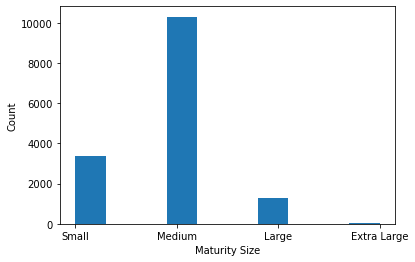

In [23]:
plt.hist(data.MaturitySize)
plt.xticks([1, 2, 3, 4], ['Small', 'Medium', 'Large', 'Extra Large'])
plt.xlabel('Maturity Size')
plt.ylabel('Count')
plt.show()

In [24]:
data.FurLength.value_counts()

1    8808
2    5361
3     824
Name: FurLength, dtype: int64

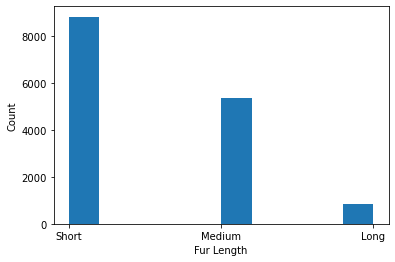

In [25]:
plt.hist(data.FurLength)
plt.xticks([1, 2, 3], ['Short', 'Medium', 'Long'])
plt.xlabel('Fur Length')
plt.ylabel('Count')
plt.show()

In [26]:
data.Vaccinated.value_counts()

2    7227
1    5898
3    1868
Name: Vaccinated, dtype: int64

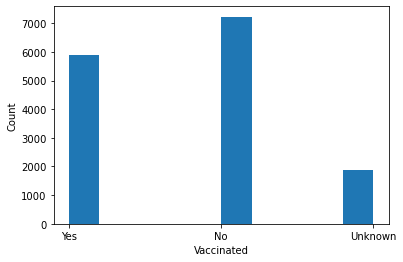

In [27]:
plt.hist(data.Vaccinated)
plt.xticks([1, 2, 3], ['Yes', 'No', 'Unknown'])
plt.xlabel('Vaccinated')
plt.ylabel('Count')
plt.show()

In [28]:
data.Dewormed.value_counts()

1    8397
2    4815
3    1781
Name: Dewormed, dtype: int64

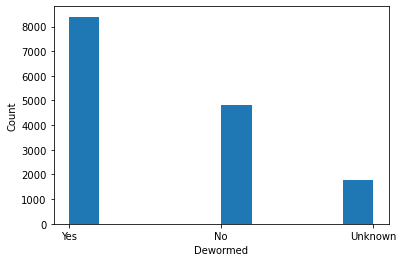

In [29]:
plt.hist(data.Dewormed)
plt.xticks([1, 2, 3], ['Yes', 'No', 'Unknown'])
plt.xlabel('Dewormed')
plt.ylabel('Count')
plt.show()

In [30]:
data.Sterilized.value_counts()

2    10077
1     3101
3     1815
Name: Sterilized, dtype: int64

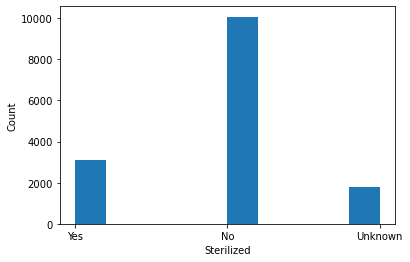

In [31]:
plt.hist(data.Sterilized)
plt.xticks([1, 2, 3], ['Yes', 'No', 'Unknown'])
plt.xlabel('Sterilized')
plt.ylabel('Count')
plt.show()

In [32]:
data.Health.value_counts()

1    14478
2      481
3       34
Name: Health, dtype: int64

In [33]:
data.Quantity.value_counts() #Need to create new predictor variable as there's too many categories

1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
13        2
14        2
18        1
Name: Quantity, dtype: int64

In [34]:
data.Fee.value_counts() 

0      12663
50       468
100      408
200      219
150      162
       ...  
210        1
99         1
330        1
75         1
599        1
Name: Fee, Length: 74, dtype: int64

In [35]:
data.State.value_counts() 

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

In [36]:
data.VideoAmt.value_counts() 

0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64

In [37]:
data.PhotoAmt.value_counts() 

1.0     3075
2.0     2518
3.0     2511
5.0     2147
4.0     1881
6.0      621
7.0      432
0.0      341
8.0      314
9.0      231
10.0     190
11.0     184
12.0      97
13.0      86
14.0      78
15.0      50
16.0      39
17.0      27
20.0      25
19.0      20
30.0      19
18.0      18
21.0      16
24.0      15
23.0      12
26.0      10
22.0       9
25.0       8
28.0       7
27.0       6
29.0       6
Name: PhotoAmt, dtype: int64

In [38]:
#create new predictor variable for description length
data['descLen'] = data['Description'].str.len()
data['descLen'].fillna(0, inplace = True)
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,pureBreed,pureColor,descLen
PetID,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,...,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1,2,359.0
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,...,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,2,118.0
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,...,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,1,2,393.0
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,...,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1,2,146.0
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,...,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,1,1,390.0


(array([1.3226e+04, 1.4070e+03, 2.5100e+02, 6.5000e+01, 2.3000e+01,
        1.0000e+01, 7.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([   0. ,  666.4, 1332.8, 1999.2, 2665.6, 3332. , 3998.4, 4664.8,
        5331.2, 5997.6, 6664. ]),
 <a list of 10 Patch objects>)

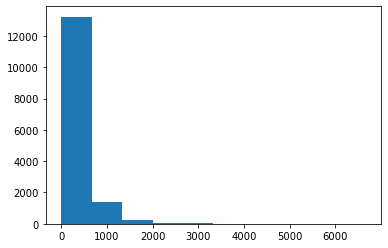

In [39]:
plt.hist(data.descLen) #Need to create meaningful groups

In [40]:
data.AdoptionSpeed.value_counts() 

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64

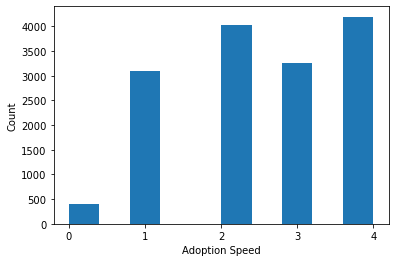

In [41]:
plt.hist(data.AdoptionSpeed)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.show()

In [42]:
# covMatrix = np.cov(data.drop(columns = ['Description', 'RescuerID', 'Name', 'PetID']))
# sns.heatmap(covMatrix, annot=True, fmt='g')
# plt.show()